In [4]:
import os
import glob
import json
import tarfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Loading Data
## /metrics/training/*.json

In [28]:
# Load metrics json : /metrics/training/*.json
metrics_file_path = './RE-GM14-training/metrics/training/training-20240719142558-qEDPVL5zQ2aaJKOtVZuE4Q.json'
with open(metrics_file_path, 'r') as file:
    metrics_data = json.load(file)

metrics = metrics_data.get('metrics')

# print('json keys', metrics_data.keys())
# print('version', metrics_data.get('version'))
# print('best metric', metrics_data.get('best_model_metric'))
# print('metrics count', len(metrics))
mdf = pd.DataFrame(metrics)
mdf


json keys dict_keys(['metrics', 'version', 'best_model_metric'])
version 2.0
best metric progress
metrics count 270


,reward_score,metric_time,start_time,elapsed_time_in_milliseconds,episode,trial,phase,completion_percentage,episode_status
0,5538,21428,5625,15803,1,1,training,26,Off track
1,2799,30024,21482,8542,2,2,training,14,Off track
2,1523,34424,30085,4339,3,3,training,7,Off track
3,1800,40561,34494,6067,4,4,training,11,Off track
4,762,44625,40628,3997,5,5,training,5,Off track
...,...,...,...,...,...,...,...,...,...
265,6469,1846693,1830081,16612,240,40,evaluation,31,Off track
266,6560,1862623,1846759,15864,240,40,evaluation,30,Off track
267,5600,1876298,1862687,13611,240,40,evaluation,26,Off track
268,33332,1923035,1876362,46673,240,40,evaluation,100,Lap complete


## sim-trace/training/training-simtrace/*.csv

In [30]:
simtrace_path = './RE-GM14-training/sim-trace/training/training-simtrace'
csv_files = []
for root, dirs, files in os.walk(simtrace_path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

# Load each CSV file into a DataFrame and store in a list
dfs = [pd.read_csv(csv_file) for csv_file in csv_files]

# Combine all DataFrames into a single DataFrame
idf = pd.concat(dfs, ignore_index=True)

Found 6 CSV files


# Plotting Functions

In [42]:
def plot_xy_coordinates(df: pd.DataFrame, hue: str = None):
    plt.figure(figsize=(14, 7))
    sns.scatterplot(data=df, x='X', y='Y', s=32, alpha=0.8, hue=hue)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.xlabel('X')
    plt.ylabel('Y')
    # plt.legend()
    plt.show()

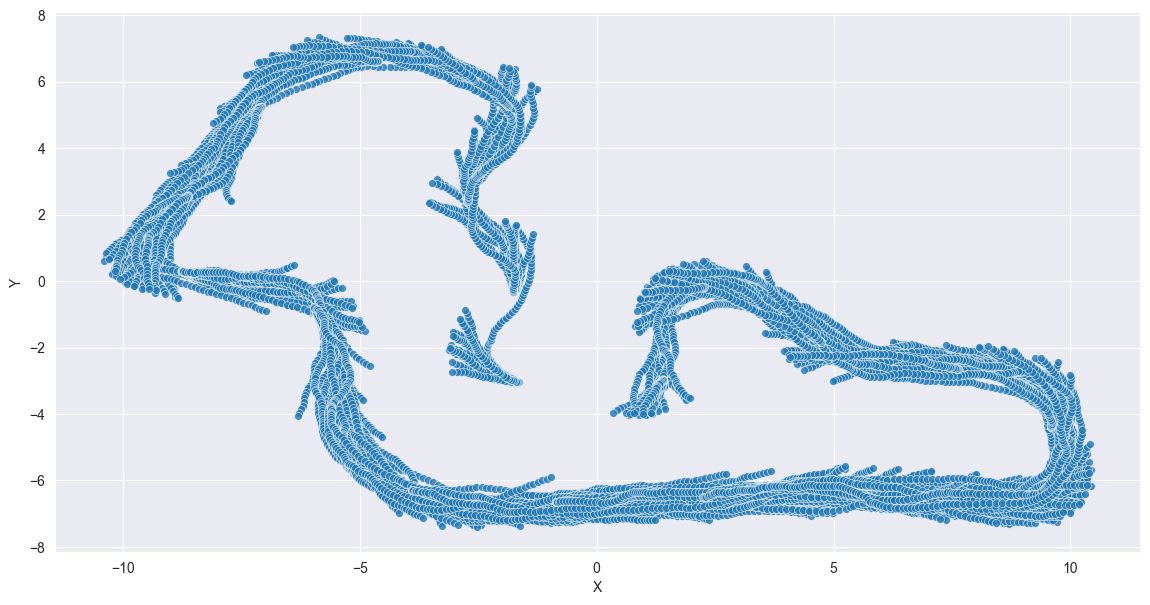

In [43]:
plot_xy_coordinates(idf)

In [38]:
def plot_steps_progress_correlation(df: pd.DataFrame):
    plt.figure(figsize=(14, 7))
    plt.subplot(2, 1, 1)
    plt.plot(df['steps'], df['progress'], label='Progress Percentage')
    plt.xlabel('Steps')
    plt.ylabel('Progress (%)')
    plt.title('Progress Percentage through Training Iterations')
    plt.legend()
    plt.show()

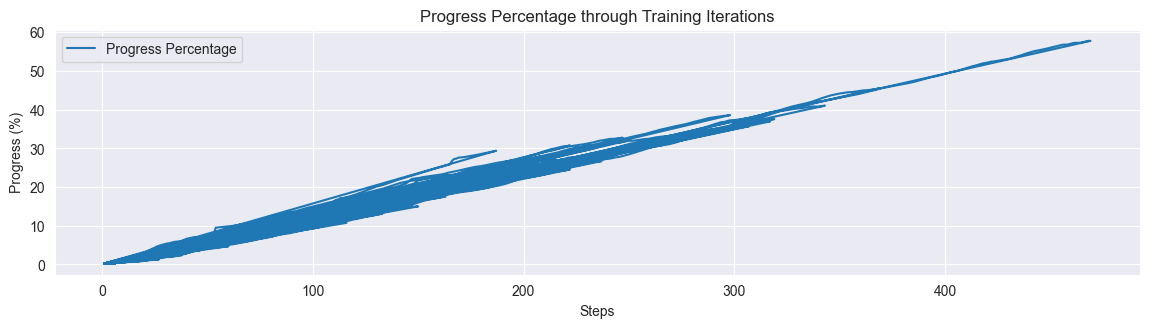

In [39]:
plot_steps_progress_correlation(idf)